### Критерий χ²-Пирсона
Чем больше число степеней свободы у распределения хи-квадрат, тем более симметричным становится такое распределение, и тем больше распределение Хи-квадрат стремится к нормальному.

In [7]:

from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import scipy

table = [[20,15],[11,12],[7,9]] #загружаем исходную табличку

chi2, prob, df, expected = scipy.stats.chi2_contingency(table) #рассчитываем параметры Хи-квадрат

#вывод:
output = "test Statistics: {}\n degrees of freedom: {}\n p-value: {}\n"
print(output.format( chi2, df, prob))
print(expected)

test Statistics: 0.9544070774762996
 degrees of freedom: 2
 p-value: 0.6205162173513055

[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]


#### Интерпретретация остатков:

Thrombosis  No  Yes
Group              
Aspirin     13    6
Placebo      7   18


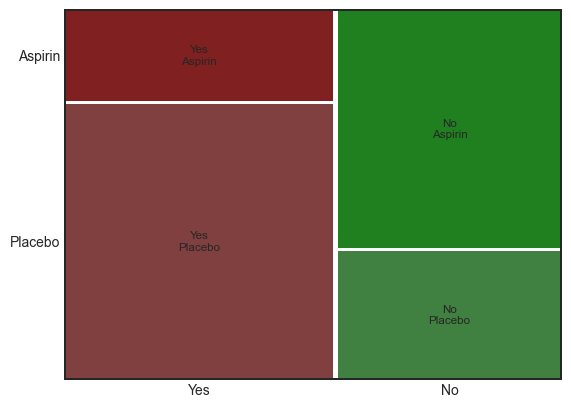

In [8]:
import pandas as pd
#воссоздадим таблицу (и подпишем строки и столбцы)
patients = pd.DataFrame({"Thrombosis": ["Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No"], "Group": ["Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin"]})
#посмотрим на сводную таблицу пересечения признаков
print(pd.pivot_table(patients, index=["Group"], columns=["Thrombosis"], aggfunc=lambda x: len(x)))
#строим график
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
mosaic(patients, ["Thrombosis","Group"], gap=0.01)
plt.show()

#### Кластерный анализ методом k-средних
Алгоритм метода k-средних:
1. Делим на рандомное кол-воко кластерть <br>
2. Случайно выбираем начальные позиции центроидов класте<br>
3. Для каждого наблюдения определяем, к какому центроиду он ближе в <br>
4. Обновляем позиции ов (среднее по каждой переменной для гпы п
 <br> ).
Если принадлежности некоторых точек изменились, то пункт 4, иначе алгоритм сошелся.

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


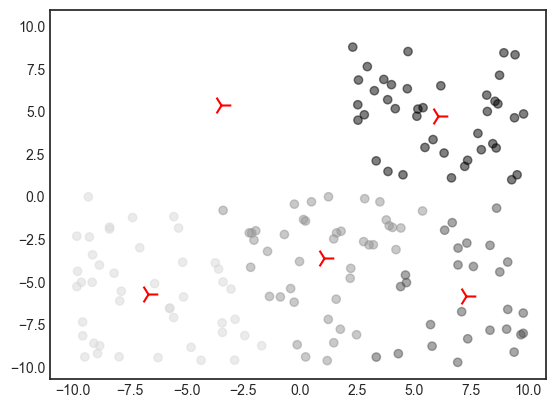

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Создаем произвольные 200 точек в диапазоне [-10, 10]
X = -10 + 20 * np.random.rand(200, 2)

# Разбиваем точки на 5 кластеров
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Получаем координаты центров кластеров
centers = kmeans.cluster_centers_

# Получаем метки кластеров для каждой точки
labels = kmeans.predict(X)

# Строим scatter plot, в котором каждый кластер отображается своим цветом
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], marker='4', s=200, c='r')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12944\191374362.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


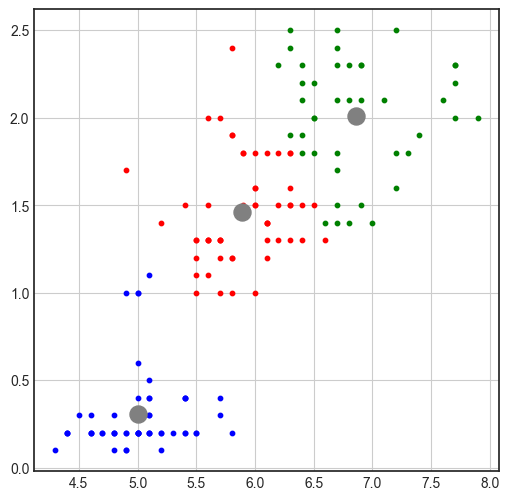

In [27]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(6, 6))
plt.style.use('seaborn-white')

# грузим данные 
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['sepal length (cm)','petal width (cm)']].values

# определяем количество кластеров (равно количеству цветов в легенде)
clusters =('red', 'green', 'blue')
n_clusters = len(clusters)

kmeans = KMeans(n_clusters=n_clusters, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
y_kmeans = kmeans.fit_predict(X)

# отрисовываем группы
for i, color in enumerate(clusters):
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans==i, 1], s=10, c=color, label =f'Cluster {i+1}')
# орисовываем центроиды
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='grey', label = 'Centroids')

# plt.xlabel('sepal length (cm)')
# plt.ylabel('petal width (cm)')
# plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()


#### 3D-визуализация зависимости: 

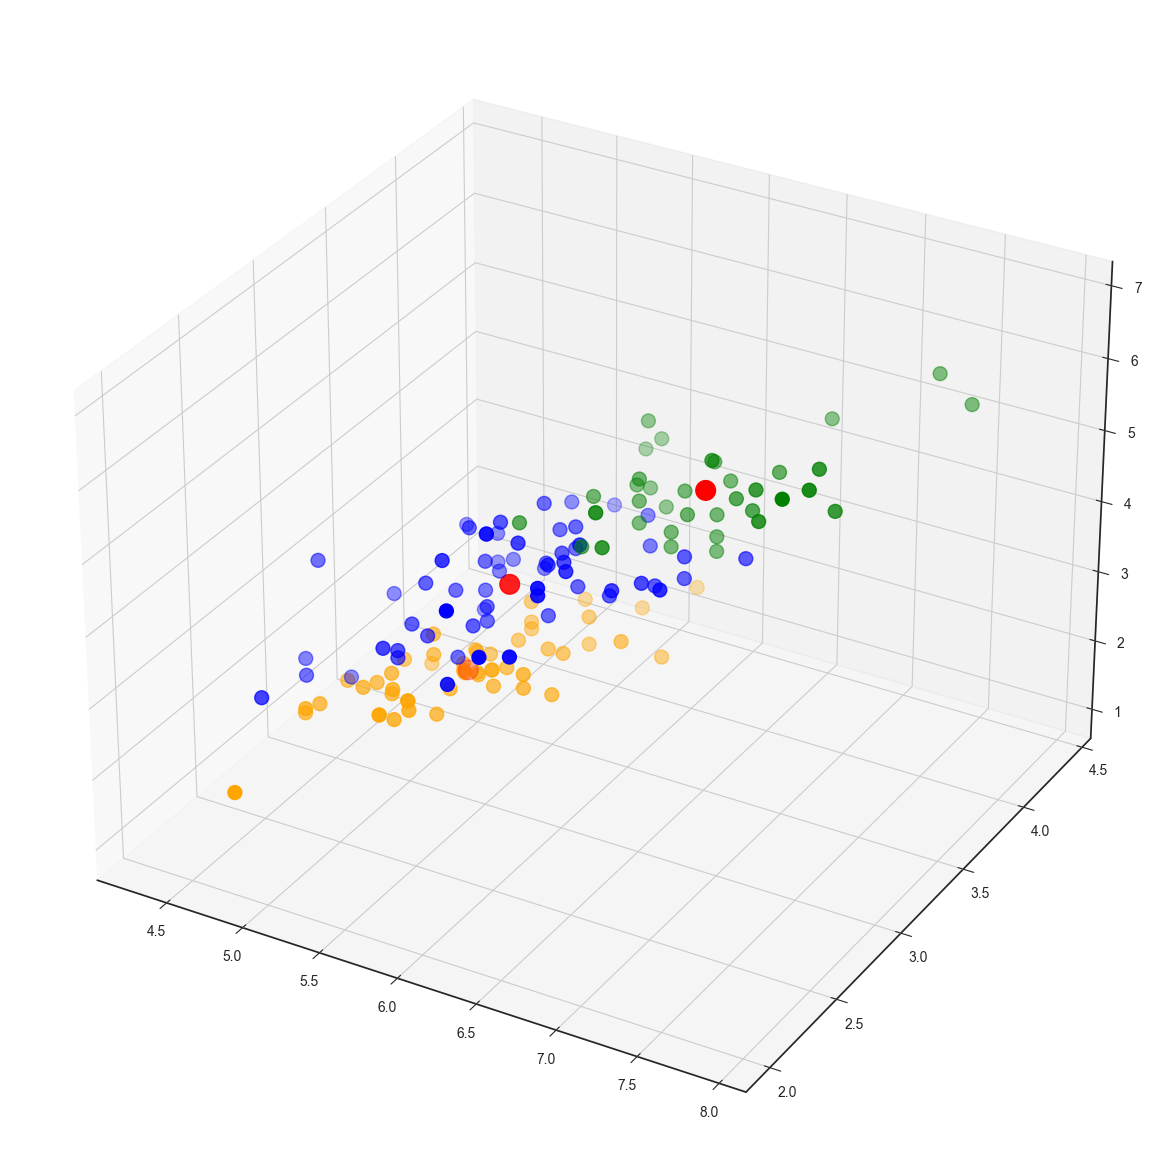

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Fix seed
SEED = 1

# Upload dataset
data = load_iris()
iris_wo_target = pd.DataFrame(data.data, columns = data.feature_names)

# Train and predict k-means
kmeans = KMeans(
    n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = SEED)
y_kmeans = kmeans.fit_predict(iris_wo_target)

# 3d plot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
for group, color in zip(np.unique(y_kmeans), ['blue', 'orange', 'green']):
    ax.scatter(iris_wo_target.iloc[y_kmeans == group, 0],
               iris_wo_target.iloc[y_kmeans == group, 1],
               iris_wo_target.iloc[y_kmeans == group, 2],
                s = 100, c = color)

# Plotting clusters centroids
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2],
           s = 200, c = 'red', label = 'Centroids')
plt.show()


#### Расчёт внутригрупповой суммы квадратов 

In [2]:
from sklearn.cluster import KMeans
import numpy as np

# Запишем координаты точек в виде массива numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])
# Обучим модель KMeans на нашем массиве с одним кластером
kmeans = KMeans(n_clusters=1).fit(X)
# Выведем координаты центроида данного кластера
print(kmeans.cluster_centers_)
# Выведем сумму квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)


[[3. 5.]]
146.0


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
